In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [159]:
def res_blk (x, n_filters , f_size = 3):
    xx = keras.layers.Conv2D(n_filters , f_size , padding='same')(x)
    xx = keras.layers.BatchNormalization ()(xx)
    xx = keras.layers.ReLU()(xx)
    xx = keras.layers.Conv2D(n_filters , f_size , padding='same')(xx)
    xx = keras.layers.BatchNormalization()(xx)
    return keras.layers.ReLU()(xx + x)

In [329]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [372]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1, 28, 28, 1)# -1이 자동으로 배치크기 맞춰 줌
x_test = x_test.reshape(-1, 28, 28, 1)

In [330]:
ret, x_train = cv2.threshold(x_train,200,255,cv2.THRESH_BINARY)
ret, x_test = cv2.threshold(x_test,200,255,cv2.THRESH_BINARY)
x_train = x_train.reshape(-1, 28, 28, 1)# -1이 자동으로 배치크기 맞춰 줌
x_test = x_test.reshape(-1, 28, 28, 1)


In [373]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
inputs= keras.Input(shape=(28,28,1))
x = keras.layers.Conv2D(64,3,activation='relu')(inputs)
x = res_blk(x,64,3)
x = keras.layers.MaxPooling2D((2,2))(x)
x = x = res_blk(x,64,3)
x = keras.layers.MaxPooling2D((2,2))(x)
x = keras.layers.Conv2D(32,3)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(62,activation='relu')(x)
outputs = keras.layers.Dense(10,activation='softmax')(x)

model = keras.Model(inputs=inputs,outputs=outputs)


In [374]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1600)              0         
                                                                 
 dense_42 (Dense)            (None, 256)             

In [375]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [378]:
model.fit(x_train,y_train,epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0481 - val_accuracy: 0.9867
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0514 - val_accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0536 - val_accuracy: 0.9885
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.0605 - val_accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0559 - val_accuracy: 0.9876


In [379]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0559 - accuracy: 0.9876
Test Accuracy: 98.76%


In [380]:
model.save('mnist_tf.h5')

In [381]:
models = keras.models.load_model('mnist_tf.h5')


In [ ]:
img = cv2.imread('test.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2.imwrite('gray.jpg',img)

img = 1 - img/255.0
# ret, img = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
img = cv2.resize(img,(28,28))

cv2.imwrite('binary.jpg',img)

img = np.expand_dims(img,axis=0)
img = np.expand_dims(img,axis=-1)

prediction = model.predict(img)
predicted_digit = np.argmax(prediction)
print(predicted_digit)


1/1 [==============================] - 0s 17ms/step


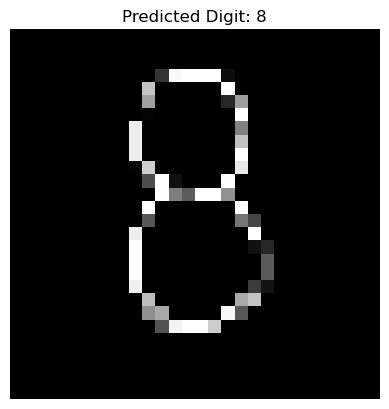

In [397]:
plt.imshow(img[0, :, :, 0], cmap="gray")
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()